In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('A100,A6000_table.csv')
df.head()

,Architecture,Set_sparsity,batch_size,inference_time,speed_increase(%),accuracy,dataset,GPU
0,ResNet50,True,1,0.575,2.21,47.42%,ImageNet,A100
1,ResNet50,False,1,0.588,0.00,47.42%,ImageNet,A100
2,ResNet50,True,16,1.330,2.99,47.42%,ImageNet,A100
3,ResNet50,False,16,1.371,0.00,47.42%,ImageNet,A100
4,ResNet50,True,64,4.431,3.31,47.42%,ImageNet,A100


In [3]:
A100 = df.iloc[:40,:]
A6000 = df.iloc[40:,:]

In [4]:
A6000.head()

,Architecture,Set_sparsity,batch_size,inference_time,speed_increase(%),accuracy,dataset,GPU
40,ResNet50,True,1,0.489,2.20,59.40%,ImageNet,A6000
41,ResNet50,False,1,0.500,0.00,59.40%,ImageNet,A6000
42,ResNet50,True,16,2.186,9.63,59.40%,ImageNet,A6000
43,ResNet50,False,16,2.419,0.00,59.40%,ImageNet,A6000
44,ResNet50,True,64,7.269,7.40,59.40%,ImageNet,A6000


In [6]:
filter = (A100.Set_sparsity == True)
A100_S = A100.loc[filter,:]
filter = (A100.Set_sparsity != True)
A100_F = A100.loc[filter,:]
filter = (A6000.Set_sparsity == True)
A6000_S = A6000.loc[filter,:]
filter = (A6000.Set_sparsity != True)
A6000_F = A6000.loc[filter,:]

In [7]:
ResNet50 = A100_S.iloc[0:5,3]
ResNet101 = A100_S.iloc[5:10,3]
ResNet152 = A100_S.iloc[10:15,3]
ResNet56 = A100_S.iloc[15:20,3]
ResNet50

0     0.575
2     1.330
4     4.431
6     7.973
8    16.035
Name: inference_time, dtype: float64

In [8]:
# [..:3] = inference time
ResNet50 = A100_S.iloc[0:5,3]
ResNet101 = A100_S.iloc[5:10,3]
ResNet152 = A100_S.iloc[10:15,3]
ResNet56 = A100_S.iloc[15:20,3]

ResNet50.index = ['1','16','64','128','256']
ResNet101.index = ['1','16','64','128','256']
ResNet152.index = ['1','16','64','128','256']
ResNet56.index = ['1','16','64','128','256']

ResNet50_F = A100_F.iloc[0:5,3]
ResNet101_F = A100_F.iloc[5:10,3]
ResNet152_F = A100_F.iloc[10:15,3]
ResNet56_F = A100_F.iloc[15:20,3]

ResNet50_F.index = ['1','16','64','128','256']
ResNet101_F.index = ['1','16','64','128','256']
ResNet152_F.index = ['1','16','64','128','256']
ResNet56_F.index = ['1','16','64','128','256']

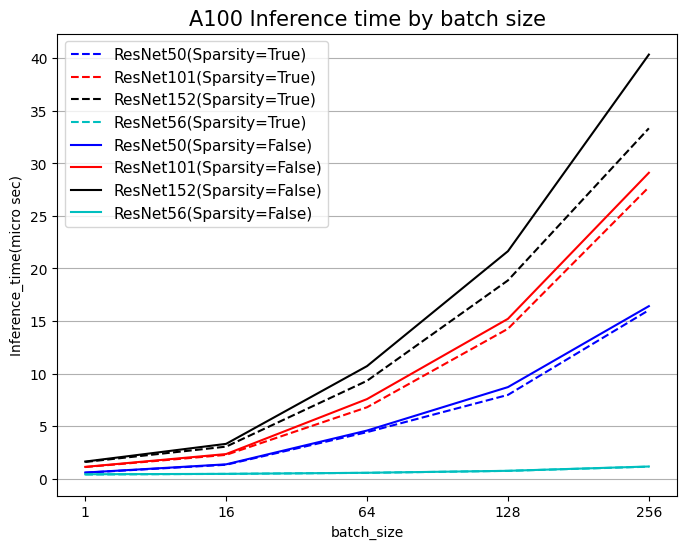

In [9]:
import matplotlib.pyplot as plt
def make_linechart(ResNet56,ResNet101,ResNet152,ResNet50,title,ylabel,rate=True):
    fig = plt.figure(figsize=(8, 6)) # 차트 생성 및 사이즈 설정
    ax = fig.add_subplot(1,1,1) # subplot 생성
    plt.grid(visible=True, axis='y')
    ax.plot(ResNet50, label='ResNet50(Sparsity=True)', color='b', linestyle= '--')
    ax.plot(ResNet101, label='ResNet101(Sparsity=True)', color='r', linestyle= '--')
    ax.plot(ResNet152, label='ResNet152(Sparsity=True)', color='k', linestyle= '--')
    ax.plot(ResNet56, label='ResNet56(Sparsity=True)', color='c', linestyle= '--')
    if rate:
        ax.plot(ResNet50_F, label='ResNet50(Sparsity=False)', color='b')
        ax.plot(ResNet101_F, label='ResNet101(Sparsity=False)', color='r')
        ax.plot(ResNet152_F, label='ResNet152(Sparsity=False)', color='k')
        ax.plot(ResNet56_F, label='ResNet56(Sparsity=False)', color='c')
        
    ax.set_title(title, fontsize=15) # 타이틀 설정
    ax.set_ylabel(ylabel, fontsize=10)
    ax.set_xlabel('batch_size', fontsize=10) 

    ax.legend(fontsize=11, loc='best') 

    plt.show() 
title = 'A100 Inference time by batch size'
ylabel = 'Inference_time(micro sec)'
make_linechart(ResNet56,ResNet101,ResNet152,ResNet50,title,ylabel)

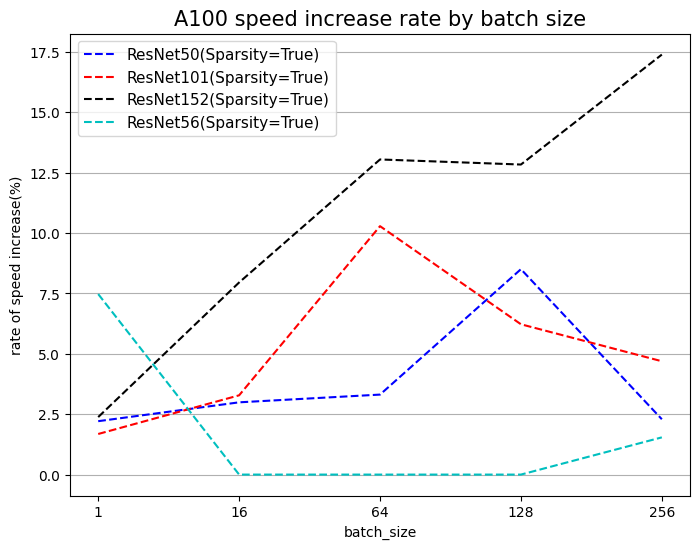

In [10]:
# [..:4] = increase of speed
ResNet50 = A100_S.iloc[0:5,4]
ResNet101 = A100_S.iloc[5:10,4]
ResNet152 = A100_S.iloc[10:15,4]
ResNet56 = A100_S.iloc[15:20,4]

ResNet50.index = ['1','16','64','128','256']
ResNet101.index = ['1','16','64','128','256']
ResNet152.index = ['1','16','64','128','256']
ResNet56.index = ['1','16','64','128','256']

title = 'A100 speed increase rate by batch size'
ylabel = 'rate of speed increase(%)'
make_linechart(ResNet56,ResNet101,ResNet152,ResNet50,title,ylabel,rate=False)

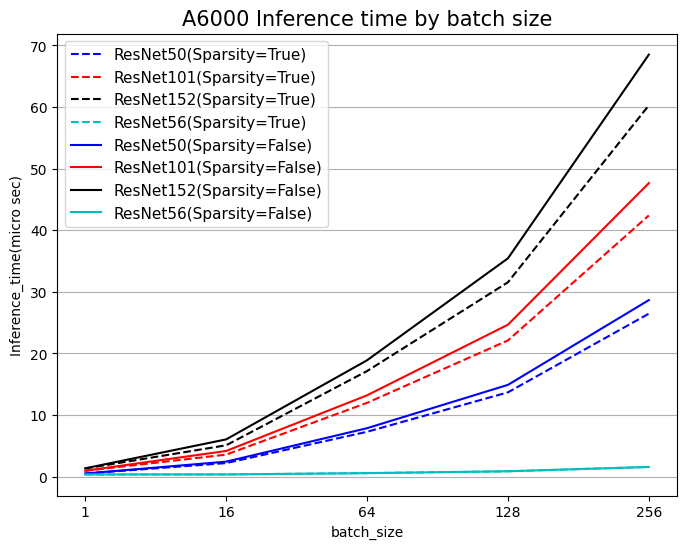

In [11]:
A100_S = A6000_S
A100_F = A6000_F
# [..:3] = inference time
ResNet50 = A100_S.iloc[0:5,3]
ResNet101 = A100_S.iloc[5:10,3]
ResNet152 = A100_S.iloc[10:15,3]
ResNet56 = A100_S.iloc[15:20,3]

ResNet50.index = ['1','16','64','128','256']
ResNet101.index = ['1','16','64','128','256']
ResNet152.index = ['1','16','64','128','256']
ResNet56.index = ['1','16','64','128','256']

ResNet50_F = A100_F.iloc[0:5,3]
ResNet101_F = A100_F.iloc[5:10,3]
ResNet152_F = A100_F.iloc[10:15,3]
ResNet56_F = A100_F.iloc[15:20,3]

ResNet50_F.index = ['1','16','64','128','256']
ResNet101_F.index = ['1','16','64','128','256']
ResNet152_F.index = ['1','16','64','128','256']
ResNet56_F.index = ['1','16','64','128','256']

title = 'A6000 Inference time by batch size'
ylabel = 'Inference_time(micro sec)'
make_linechart(ResNet56,ResNet101,ResNet152,ResNet50,title,ylabel)

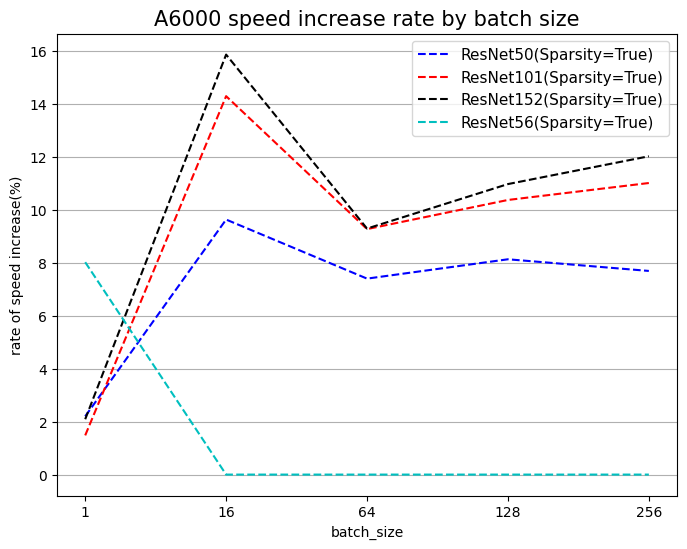

In [12]:
A100_S = A6000_S
A100_F = A6000_F
# [..:4] = increase of speed
ResNet50 = A100_S.iloc[0:5,4]
ResNet101 = A100_S.iloc[5:10,4]
ResNet152 = A100_S.iloc[10:15,4]
ResNet56 = A100_S.iloc[15:20,4]

ResNet50.index = ['1','16','64','128','256']
ResNet101.index = ['1','16','64','128','256']
ResNet152.index = ['1','16','64','128','256']
ResNet56.index = ['1','16','64','128','256']

title = 'A6000 speed increase rate by batch size'
ylabel = 'rate of speed increase(%)'
make_linechart(ResNet56,ResNet101,ResNet152,ResNet50,title,ylabel,rate=False)